In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.integrate import odeint

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 20
# import seaborn as sns
%matplotlib inline

In [7]:
def lagrange_equations(var, t, params):
    """
    Defines the differential equations for the secular evolution of 
    a three body system.
    
    Arguments:
        var :  vector of the state variables:
                  var = [e_i, w_i, e_o, w_o]
        t :  time
        params :  vector of the parameters:
                  params = [m1, m2, m3, nu_i, nu_o, a_i, alpha]
    """
    e_i, w_i, e_o, w_o = var
    m1, m2, m3, nu_i, nu_o, alpha = params
    m12 = m1 + m2
    # Calculate derivatives
    f = np.array([
        -nu_i*(15/16.)*(m3/m12)*(m1 - m2)/m12*alpha**4*e_o*\
        (1 + 3/4*e_i**2)*(1 - e_i**2)**.5/(1 - e_o**2)**2.5*np.sin(w_i - w_o),
        
        nu_i*m3/m12*(3/4*alpha**3*(1 - e_i**2)**.5/(1 - e_o**2)**(3/2.) -\
        15/16.)*(m1 - m2)/m12*alpha**4*e_o*(1 + 9/4*e_i**2)*(1 - e_i**2)**.5/\
        e_i*(1 - e_o**2)**2.5*np.cos(w_i - w_o),
        
        nu_o*15/16.*m1*m2/m12**2*(m1 - m2)/m12*alpha**3*e_i*(1 + 3/4.*e_i**2)/\
        (1 - e_o**2)**2*np.sin(w_i - w_o),
        
        nu_o*m1*m2/m12**2*(3/4.*alpha**2*(1 + 3/2.*e_i**2)/(1 - e_o**2)**2 -\
        15/16.*(m1 - m2)/m12*alpha**3*(1 + 3/4.*e_i**2)*e_i/e_o*(1 + 4*e_o**2)/\
        (1 - e_o**2)**3*np.cos(w_i - w_o))
    ])
    
    return f

# Parameter values:
m1 = 0.81
m2 = 0.89
m3 = 0.12*9.5458e-04
nu_i = 2*np.pi/20.733
nu_o = 2*np.pi/131.458

# ratio of semi-major axes from Kepler's third law
alpha = ((m1 + m2)/(m1 + m2 + m3))**(1/3.) * (nu_o/nu_i)**(2/3.)

# Initial conditions 
e_i = 0.14210
w_i = 0.
e_o = 0.042
w_o = np.pi/2.

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Time grid
t = np.linspace(0, 1e06, 1000)

params = np.array([m1, m2, m3, nu_i, nu_o, alpha])
var0 = np.array([e_i, w_i, e_o, w_o])

# Call the ODE solver.
sol = odeint(lagrange_equations, var0, t, args=(params,),
              atol=abserr, rtol=relerr)

TypeError: tuple indices must be integers or slices, not tuple

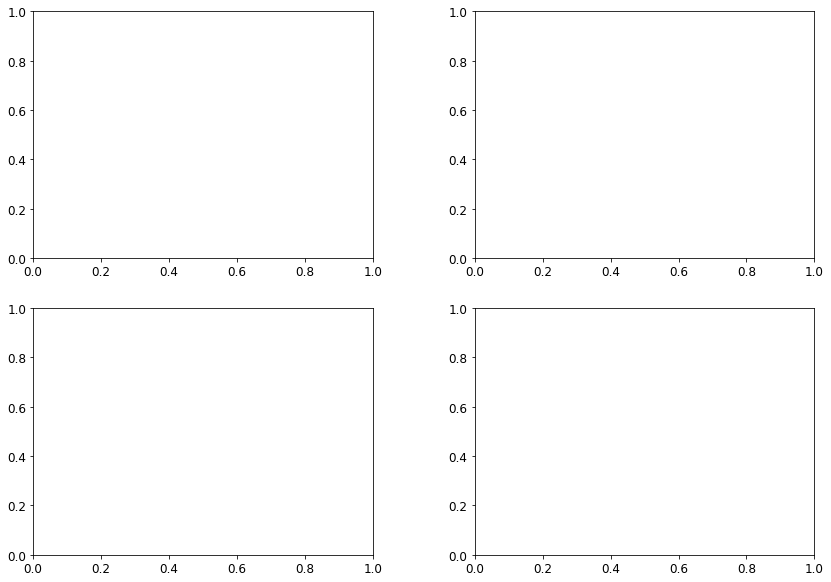

In [9]:
# Plot results
fig, ax = plt.subplots(2,2, figsize=(14,10))
fig.subplots_adjust(wspace=.3)

for i, a in enumerate(ax.ravel()):
    a.plot(t/1.e06, sol[:, i]);
    a.set_xlabel(r'$t$ [Myr]')
    
ax[0, 0].set_ylabel(r'$e_i$')
ax[0, 1].set_ylabel(r'$\varpi_i$')
ax[1, 0].set_ylabel(r'$e_o$')
ax[1, 1].set_ylabel(r'$\varpi_o$')
# ax[0, 0].set_ylim(0., 0.143)